# Lab 7 - Performance Metrics for Classification Problems

Multiclass classification is being conducted using the MNIST dataset, with the model's performance being evaluated using a range of performance metrics.

## 1. Download the MNIST data 

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

## 2. Run an EDA 

The datatype is

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.
[Refrence from here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

Let's check the keys of this dictionary

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# Let's see how many values it contains
print("Shape of the dataset:", mnist.data.shape)
print("")
print("Unique labels: ", np.unique(mnist.target))

Shape of the dataset: (70000, 784)

Unique labels:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [6]:
X = mnist.data
y = mnist.target

First let's see how the data look like by visualizing some sample images.

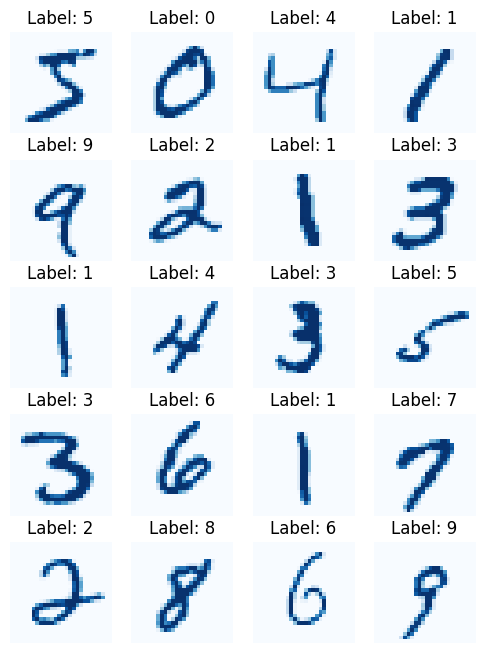

In [7]:
fig, axes = plt.subplots(5, 4, figsize=(6, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap='Blues')
    ax.set_title("Label: %s" % mnist.target[i])
    ax.axis('off')
plt.show()

Now we find out how the dataset is distributed across different labels:

<Axes: xlabel='class', ylabel='count'>

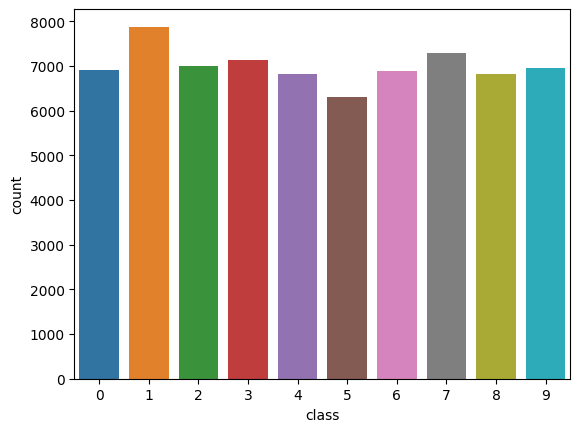

In [8]:
# First let's see how many unique values are there
y_values, counts = np.unique(y, return_counts=True)

# Make it into a DataFrame
df_target = pd.DataFrame({'class': y_values, 'count': counts})

sns.barplot(df_target, x="class", y="count")

From the histogram we can see that the data is almost equally distributed.

## 3. The original MNIST has 10 classes. I have choosen 4 Classes : [2,3,5,9]

In [9]:
# Define selected classes
my_classes = [2, 3, 5, 9]

# Filter dataset for selected classes
X1 = X[np.isin(y.astype(int), my_classes)]
y1 = y[np.isin(y.astype(int), my_classes)]

## 4.Split the dataset to train-validation-test.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

# Check that the size of split data
print("Training set shapes:", X_train.shape)
print("Validation set shapes:", X_val.shape)
print("Test set shapes:", X_test.shape)

Training set shapes: (19181, 784)
Validation set shapes: (4110, 784)
Test set shapes: (4111, 784)


## 5.Choose a model from a Kaggle notebook, and fit it.
https://www.kaggle.com/code/amirdhavarshinis/mnist-digit-recognizer

In [11]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

SGDClassifier(random_state=42)

## 6. Run an evaluation on the validation dataset

##### 1. Accuracy

In [12]:
from sklearn.metrics import accuracy_score
y_pred_val = model.predict(X_val)

#Checking accuracy
accuracy = round(accuracy_score(y_val, y_pred_val), 3)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.93


**Insight**: This SGD classifier model has an accuracy of approximately 0.93, which means that out of the 4110 pieces of data in the validation set, about 3816 were successfully classified.

##### 2. Confusion Metric

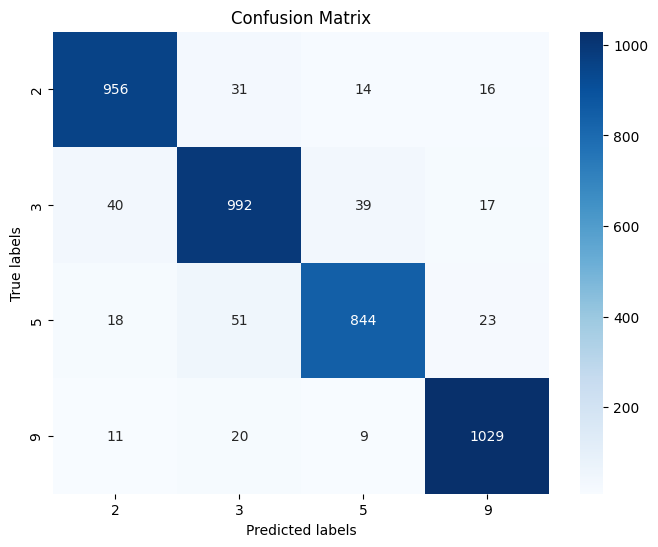

In [13]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
confusion = confusion_matrix(y_val, y_pred_val)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Insights**: By analyzing the diagonal values of the confusion matrix, you can ascertain the number of instances where the predicted class matches the actual class. For instance, when predicting the digit 9, there are 1029 instances where the actual value is 9 and very low numbers for other labels, suggesting that the prediction performance for 9 is relatively good.

##### 3. Precision, recall and F1 for each class

In [14]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_val, y_pred_val, target_names=model.classes_, output_dict=True)

# Create a DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame
df_report[['precision', 'recall', 'f1-score', 'support']]

,precision,recall,f1-score,support
2,0.932683,0.940020,0.936337,1017.000000
3,0.906764,0.911765,0.909258,1088.000000
5,0.931567,0.901709,0.916395,936.000000
9,0.948387,0.962582,0.955432,1069.000000
accuracy,0.929684,0.929684,0.929684,0.929684
macro avg,0.929850,0.929019,0.929355,4110.000000
weighted avg,0.929652,0.929684,0.929594,4110.000000


**Insights**:<br/><br/>
Precision: The performance in classifying 2, 5 and 9 is the best with scores of 0.93, 0.93 and 0.95, respectively, while the performance in classifying 3 is the lowest with scores of 0.90, which still pretty good.

Recall: The performance in classifying 9 is the best with a score of 0.96.

##### 4. Precision-recall curve for one class vs. all others
Chosen class: 5

In [15]:
from sklearn.metrics import precision_recall_curve

y_scores = model.decision_function(X_val)
y_scores_5 = y_scores[:, 2]
y_val_5 = (y_val == '5').astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_val_5, y_scores_5)

print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])

[0.22773723 0.22779265 0.2278481  0.22790358 0.22795908]
[1. 1. 1. 1. 1.]
[-174120.10136695 -173995.08346209 -172507.95175568 -163488.79810211
 -163304.89424562]


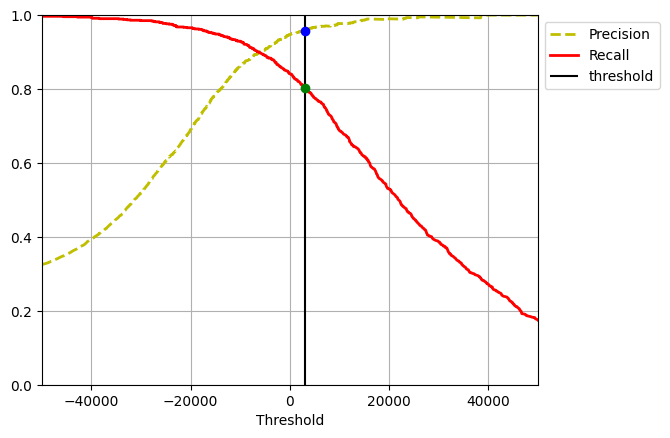

In [16]:
threshold = 3000
plt.plot(thresholds, precisions[:-1], "y--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "r-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "solid", label="threshold")
idx = (thresholds >= threshold).argmax() 
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

The classification performance for classifying class 5 is as follows: precision is 0.93 and recall is 0.90. Analyzing the precision-recall curve reveals that reducing the threshold decreases precision but increases recall, whereas increasing the threshold boosts precision but reduces recall.

## 7. Pushing the limits of performance

Let's try to increase Precision

In [17]:
from sklearn.metrics import precision_score, recall_score

idx_for_99 = (precisions >= 0.99).argmax()
pthreshold_for_99 = thresholds[idx_for_99]
print('The threshold for 99% precision would be', pthreshold_for_99)

y_val_pred_99 = (y_scores_5 >= pthreshold_for_99)
print('Precision Score: ', precision_score(y_val_5, y_val_pred_99))
print('Recall Score: ', recall_score(y_val_5, y_val_pred_99))

The threshold for 99% precision would be 19494.60771364862
Precision Score:  0.9901380670611439
Recall Score:  0.5363247863247863


Now we try to increase Recall

In [18]:
idx_for_99 = (recalls >= 0.99).argmax()
rthreshold_for_99 = thresholds[idx_for_99]
print('The threshold for 99% recall would be', rthreshold_for_99)

y_val_pred_99 = (y_scores_5 >= rthreshold_for_99)
print('Precision Score: ', precision_score(y_val_5, y_val_pred_99))
print('Recall Score: ', recall_score(y_val_5, y_val_pred_99))

The threshold for 99% recall would be -174120.1013669476
Precision Score:  0.22773722627737225
Recall Score:  1.0


**Insight**: From above calculations we can say that threshold at 19494 gives near perfect precision and to achisve same performance for recal (i.e. near perfect recall) we need to lower the threshold to -174120

## 8. Checking on Test set

In [19]:
y_pred_test = model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred_test), 3)
print("Accuracy on the test set is", accuracy)

Accuracy on the test set is 0.929


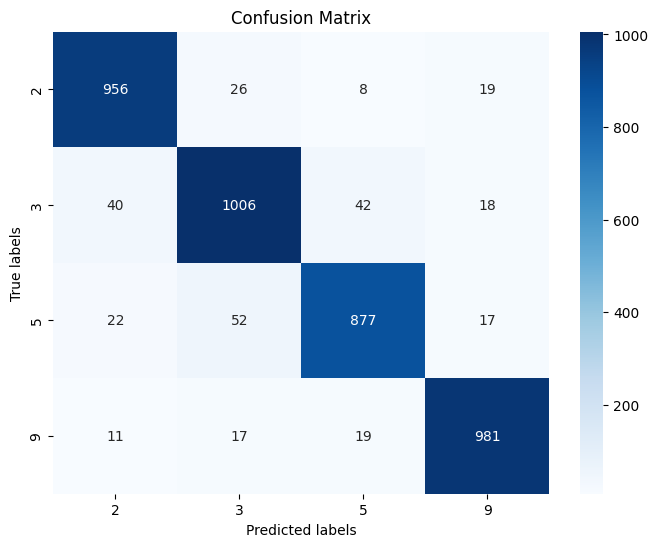

In [20]:
confusion = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
report = classification_report(y_test, y_pred_test, target_names=model.classes_, output_dict=True)

# Create a DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame
df_report[['precision', 'recall', 'f1-score', 'support']]

,precision,recall,f1-score,support
2,0.929057,0.947473,0.938175,1009.000000
3,0.913715,0.909584,0.911645,1106.000000
5,0.927061,0.905992,0.916405,968.000000
9,0.947826,0.954280,0.951042,1028.000000
accuracy,0.929214,0.929214,0.929214,0.929214
macro avg,0.929415,0.929332,0.929317,4111.000000
weighted avg,0.929153,0.929214,0.929129,4111.000000


## Conclusion:
* The accuracy on test set is 0.929 which very near to that of validation set. Similarly, precision, recall and f1-scores are also very close to those of validation set with only one-hundredths of difference.
* Class 9 has both the highest precision (94%) and recall (95%). Rest of the classes also have fairly high precision and recall.
* Model can classify our choosen digits [2,3,5,9] with a average accuracy of 93% precision as well as recall.